In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/novartis-data/Test.csv
/kaggle/input/novartis-data/sample_submission.csv
/kaggle/input/novartis-data/Train.csv


In [44]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score

In [29]:
train = pd.read_csv("/kaggle/input/novartis-data/Train.csv")
submit = pd.read_csv("/kaggle/input/novartis-data/sample_submission.csv")
test = pd.read_csv("/kaggle/input/novartis-data/Test.csv")

In [30]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


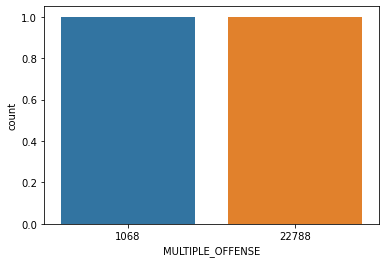

In [31]:
sns.countplot(train.MULTIPLE_OFFENSE.value_counts())

In [32]:
train.MULTIPLE_OFFENSE.value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [33]:
test.shape

(15903, 17)

In [34]:

train.head(2)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1


In [35]:
X = train.drop(['MULTIPLE_OFFENSE', 'DATE', 'INCIDENT_ID'],axis=1)
eval_X = test.drop(['DATE','INCIDENT_ID'],axis=1)
Y = train['MULTIPLE_OFFENSE']

incident_ids_train = train['INCIDENT_ID']
incdent_ids_test = test['INCIDENT_ID']


In [36]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33)

In [37]:
X_train.shape, y_train.shape,X_test.shape

((10708, 15), (10708,), (7873, 15))

In [38]:
X_train.fillna(0, inplace=True)
X_cv.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
eval_X.fillna(0, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

In [40]:
X_cv = pd.DataFrame(scaler.transform(X_cv), columns = X_cv.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
eval_X = pd.DataFrame(scaler.transform(eval_X), columns = eval_X.columns)

# **Applying GradientBoostingClassifier**

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#Additional scklearn functions
from sklearn.model_selection import GridSearchCV

In [15]:
X_train.shape, y_train.shape

((10708, 15), (10708,))

In [20]:
X_train.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,-0.332315,-0.185789,-0.177784,0.917415,0.282958,0.411407,-0.484820,4.298887,-2.142318,-0.245358,-2.239944,0.040546,-0.485224,1.606668,0.073272
1,-0.332315,-0.054100,-0.045181,-1.453000,-1.247558,0.186495,-1.000331,-0.599358,0.051073,-0.245358,-0.366126,-0.932931,-2.448902,-0.999163,1.479990
2,-0.332315,0.999411,1.015638,-0.775739,-0.737386,-1.162974,-1.258086,0.012923,0.051073,-0.245358,0.441554,0.040546,-0.485224,1.076278,0.073272
3,-0.332315,0.801878,0.816734,-1.453000,-1.247558,-0.263328,0.288446,0.012923,0.051073,-0.245358,0.441554,0.040546,0.642072,0.799552,0.073272
4,-0.332315,-1.370989,-1.371205,0.578784,1.303302,-0.713151,0.030691,0.012923,0.782203,0.765139,-2.239944,1.014024,-3.030732,-0.999163,0.073272


# **Hyper parameter tuning**

In [30]:
#Choose all predictors except target & IDcols
predictors = [x for x in X_train.columns]
param_test1 = {'n_estimators':range(140,401,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train[predictors],y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
    

In [31]:
 gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 320}, 0.9992428269564269)

In [37]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=320, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train[predictors],y_train)
gsearch2.best_params_, gsearch2.best_score_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 7, 'min_samples_split': 200}, 0.9996672693724331)

In [39]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=320,max_depth=7, min_samples_split=200, min_samples_leaf=60, subsample=0.9, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train[predictors],y_train)
gsearch4.best_params_, gsearch4.best_score_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_features': 7}, 0.999401219545818)

In [38]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=320,max_depth=7,min_samples_split=200, min_samples_leaf=60, subsample=0.8, random_state=10,max_features=7),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train[predictors],y_train)
gsearch5.best_params_, gsearch5.best_score_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'subsample': 0.9}, 0.999401219545818)

In [16]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=320,max_depth=7, min_samples_split=200,min_samples_leaf=40, subsample=0.90, random_state=10, max_features=7)
gbm_tuned_1

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=7,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=200,
                           min_weight_fraction_leaf=0.0, n_estimators=320,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:
gbm_tuned_1.fit(X_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=7,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=200,
                           min_weight_fraction_leaf=0.0, n_estimators=320,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
res = gbm_tuned_1.predict(X_test)

In [21]:
print(f1_score(y_test, res))

0.9987389659520807


In [22]:
res = gbm_tuned_1.predict(eval_X)
res_df = pd.DataFrame({'MULTIPLE_OFFENSE':res, 'INCIDENT_ID': incdent_ids_test})
res_df1 = res_df[['INCIDENT_ID','MULTIPLE_OFFENSE']]

In [23]:
res_df.shape, res_df1.shape

((15903, 2), (15903, 2))

In [24]:
res_df1.to_csv("output_2.csv",index = False)

# Trying out with Knn, GaussianNB, SVC

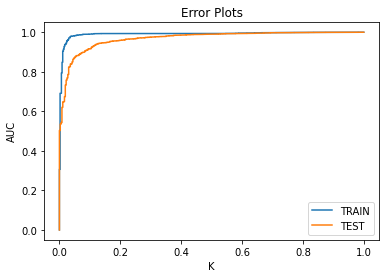

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

best_k_value = 13

neigh = svm.SVC(probability=True, class_weight={0: 10})



# neigh = KNeighborsClassifier(n_neighbors=best_k_value)

# neigh = GaussianNB()
neigh.fit(X_train, y_train)

train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label = 'TRAIN')
plt.plot(test_fpr, test_tpr, label = 'TEST')
plt.legend()
plt.xlabel('K')
plt.ylabel('AUC')
plt.title('Error Plots')
plt.show()

In [43]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score

y_train_predict = neigh.predict(X_train)
y_test_predict = neigh.predict(X_test)

train_confusion_matrix = confusion_matrix(y_train, y_train_predict)
test_confusion_matrix = confusion_matrix(y_test, y_test_predict)

In [65]:
print("train CM:")
# print(train_confusion_matrix)

print("test CM:")
print(test_confusion_matrix)


train CM:
test CM:
[[ 276   70]
 [ 318 7209]]


In [52]:
print("Training F1 score")
print(f1_score(y_train, y_train_predict))
print("Test F1 score")
print(f1_score(y_test, y_test_predict))


Training F1 score
0.9804291674945361
Test F1 score
0.9737944076725652


In [53]:
# eval_X.head()

In [54]:
res = neigh.predict(eval_X)
res_df = pd.DataFrame({'MULTIPLE_OFFENSE':res, 'INCIDENT_ID': incdent_ids_test})
res_df1 = res_df[['INCIDENT_ID','MULTIPLE_OFFENSE']]


In [55]:
print(res_df.shape)

(15903, 2)


In [ ]:
res_df1.head()

In [ ]:
res_df1.to_csv("results3.csv",index = False)